In [3]:
import pypsa

In [4]:
import matplotlib.pyplot as plt
plt.style.use("bmh")
%matplotlib inline

In [5]:
n = pypsa.Network("results/testLowTheat/postnetworks/elec_s_37_lvopt__Co2L0p05-97H-T-H-B-I-bioT-hvdc_2030.nc")

/home/millinger/miniconda3/envs/pypsa-eur/lib/python3.8/site-packages/pypsa/io.py:769: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  pnl[attr] = pnl[attr].reindex(columns=df.index | columns, fill_value=default)
/home/millinger/miniconda3/envs/pypsa-eur/lib/python3.8/site-packages/pypsa/io.py:771: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  pnl[attr] = pnl[attr].reindex(columns=(pnl[attr].columns | columns))
INFO:pypsa.io:Imported network elec_s_37_lvopt__Co2L0p05-97H-T-H-B-I-bioT-hvdc_2030.nc has buses, carriers, generators, global_constraints, links, loads, storage_units, stores


INFO:numexpr.utils:NumExpr defaulting to 6 threads.


(<matplotlib.collections.PatchCollection at 0x7fecc87057c0>,
 <matplotlib.collections.LineCollection at 0x7fecc757f250>)

/home/millinger/miniconda3/envs/pypsa-eur/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:387: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  return matplotlib.axes.Axes.draw(self, renderer=renderer,


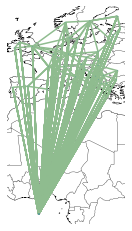

In [6]:
n.plot()

In [6]:
n.objective / 1e9 #billion EUR p.a.

950.5823938403573

In [5]:
import cartopy.crs as ccrs

In [6]:
loading = (n.links_t.p0.abs().mean().sort_index() / (n.links.p_nom_opt*n.links.p_max_pu).sort_index()).fillna(0.)
# PlateCarree, Mercator, Orthographic\n",
notdc_b = n.links.index[n.links.carrier != "DC"]                        
loading[notdc_b] = 0

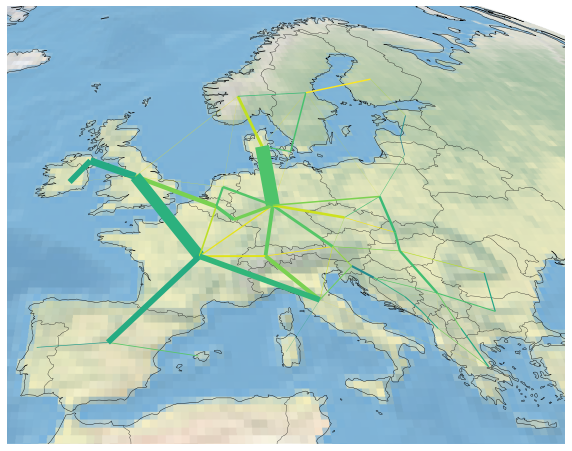

In [7]:
fig,ax = plt.subplots(
    figsize=(10,10),
    subplot_kw={"projection": ccrs.Orthographic()},
    )

dc_b = n.links.index[n.links.carrier == "DC"]
notdc_b = n.links.index[n.links.carrier != "DC"]
n.links.loc[dc_b, "temp"] = n.links.p_nom_opt
n.links.loc[notdc_b, "temp"] = 0
#n.links.temp.fillna(0.01)
    
n.plot(ax=ax,
          bus_colors='gray',
          branch_components=["Link"],
          link_widths=n.links.temp / 5e3,
          link_colors=loading,
          link_cmap=plt.cm.viridis,
          color_geomap=True,
          bus_sizes=0)
#ax.axis('on');\n",
#ax.set(xlim=(0, 40), ylim=(-50, 50))\n",
#ax.xlim\n",
#ax.set_extent([-1058286, 2449341, 3700000, 6067277], crs=ccrs.Orthographic())\n",
ax.set_extent([-1058286, 2949341, 4000000, 12067277], crs=ccrs.Mercator())

ax.stock_img()
ax.get_extent()
fig.savefig(fname="grid.png")

In [11]:
n.generators.p_nom_opt

name
AL0 0 offwind-ac    4.214022e-02
AL0 0 onwind        4.328862e-02
AL0 0 solar         1.786885e+04
AT0 0 onwind        5.930744e-02
AT0 0 ror           4.478505e+03
                        ...     
SK0 0 onwind        9.244104e-02
SK0 0 ror           6.413300e+02
SK0 0 solar         8.307047e-01
EU gas              4.495501e+05
EU oil              1.612543e+06
Name: p_nom_opt, Length: 152, dtype: float64

In [7]:
n.links.loc[n.links.carrier=='Fischer-Tropsch'].p_nom_opt.sort_values(ascending=False).head(50)

name
GB5 0 Fischer-Tropsch      134659.466990
DK0 0 Fischer-Tropsch       56957.347731
IE4 0 Fischer-Tropsch       29707.255322
EE6 0 Fischer-Tropsch       19578.930492
PL0 0 Fischer-Tropsch       15976.565467
RO0 0 Fischer-Tropsch       13402.354118
SE3 0 Fischer-Tropsch       10114.768255
DK3 0 Fischer-Tropsch        8795.599785
GB4 0 Fischer-Tropsch        6217.310730
FI3 0 Fischer-Tropsch        1765.405570
NO3 0 Fischer-Tropsch        1185.886799
MK0 0 Fischer-Tropsch          35.673605
NL0 0 Fischer-Tropsch           3.175091
LV6 0 Fischer-Tropsch           1.030232
RS0 0 Fischer-Tropsch           0.742707
BE0 0 Fischer-Tropsch           0.565094
LT6 0 Fischer-Tropsch           0.408872
SK0 0 Fischer-Tropsch           0.387769
CZ0 0 Fischer-Tropsch           0.328818
LU0 0 Fischer-Tropsch           0.291892
CH0 0 Fischer-Tropsch           0.247050
BA0 0 Fischer-Tropsch           0.225338
DE0 0 Fischer-Tropsch           0.221118
AL0 0 Fischer-Tropsch           0.209508
ME0 0 Fisch

In [8]:
n.links.groupby("carrier").p_nom_opt.sum() / 1e3 #GW

carrier
BEV charger                                           704.126759
BioSNG                                                  0.000039
DAC                                                   106.380452
DC                                                    724.762284
Fischer-Tropsch                                       298.405564
H2 Electrolysis                                       787.739329
H2 Fuel Cell                                            0.000457
H2 pipeline                                           118.930027
OCGT                                                    0.002319
SMR                                                     0.000610
SMR CC                                                  0.000411
Sabatier                                                0.000437
V2G                                                   704.126759
battery charger                                         0.008087
battery discharger                                      0.008253
biogas to gas    

In [24]:
n.stores_t.e.filter(regex='co2 stored') /1e6#.sum() / 1e6 #MtCO2

name,co2 stored
name,
2013-01-01 00:00:00,10.639570
2013-01-05 01:00:00,27.803774
2013-01-09 02:00:00,40.980689
2013-01-13 03:00:00,49.393167
2013-01-17 04:00:00,61.001496
...,...
2013-12-14 14:00:00,968.377098
2013-12-18 15:00:00,978.171115
2013-12-22 16:00:00,987.584221


In [17]:
n.stores_t.p.filter(regex='co2 stored') #tCO2

name,co2 stored
name,
2013-01-01 00:00:00,-109686.283961
2013-01-05 01:00:00,-176950.561379
2013-01-09 02:00:00,-135844.484676
2013-01-13 03:00:00,-86726.580159
2013-01-17 04:00:00,-119673.488767
...,...
2013-12-14 14:00:00,-108985.480875
2013-12-18 15:00:00,-100969.248976
2013-12-22 16:00:00,-97042.333165


In [20]:
n.stores.e_nom_opt

name
co2 atmosphere           9.197428e+08
co2 stored               1.000000e+09
EU gas Store             5.877238e+08
DE0 0 H2 Store           3.076373e+05
DK0 0 H2 Store           4.352359e+06
                             ...     
RO0 0 battery storage    2.709375e+04
RS0 0 battery storage    2.028825e+04
SE3 0 battery storage    2.750344e+04
SI0 0 battery storage    6.984375e+03
SK0 0 battery storage    1.093313e+04
Name: e_nom_opt, Length: 271, dtype: float64

In [31]:
n.links.p_nom_opt.filter(regex='DE.*lowT')

name
DE0 0 solid biomass for lowT industry           0.028286
DE0 0 solid biomass for lowT industry CC    12198.548173
DE0 0 methane for lowT industry                 0.022118
DE0 0 methane for lowT industry CC          11266.215874
DE0 0 H2 for lowT industry                      0.014603
Name: p_nom_opt, dtype: float64